# Preparation and cleansing of  the World Bank Unemployment data.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# load csv file as Pandas Dataframe
unemp_df = pd.read_csv('datasets/world_bank_youth_unemployment.csv')

In [4]:
unemp_df

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,10/26/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000
4,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.751,24.495,24.997,24.640,24.583,24.508,24.524,26.077,25.981,25.641
267,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.810,43.958,41.999,43.936,42.811,43.761,47.406,43.499,49.864,51.519
268,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.072,17.144,17.206,17.146,17.051,8.726,10.325,11.022,11.101,11.033


In [7]:
# Read the data with the fourth row as headers
unemp_df = pd.read_csv('datasets/world_bank_youth_unemployment.csv', header=4)

In [8]:
unemp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.102415,12.992790,12.874319,13.007650,12.973653,12.887711,13.281005,14.138644,14.137466,14.134125
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.224000,10.086000,12.495000,14.902000,17.303000,17.292000,17.339000,16.053000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.084479,8.432707,8.860586,8.690286,8.785932,8.910159,9.005565,10.444833,9.874787,9.726148
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.595000,16.428000,16.437000,16.436000,16.363000,16.343000,16.283000,17.967000,17.523000,17.279000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.751000,24.495000,24.997000,24.640000,24.583000,24.508000,24.524000,26.077000,25.981000,25.641000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.810000,43.958000,41.999000,43.936000,42.811000,43.761000,47.406000,43.499000,49.864000,51.519000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.072000,17.144000,17.206000,17.146000,17.051000,8.726000,10.325000,11.022000,11.101000,11.033000


In [39]:
#Select the row for South Africa
sa_unemp_df = unemp_df[unemp_df['Country Name'] == 'South Africa']

In [40]:
sa_unemp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.81,43.958,41.999,43.936,42.811,43.761,47.406,43.499,49.864,51.519


In [41]:
#pivot the South Africa row
#This code will pivot the data for South Africa from wide to long format, 
#where each row will represent a specific year and its corresponding unemployment rate value for South Africa.
sa_unemp_df_pivoted = sa_unemp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Unemployment_Rate')

In [42]:
sa_unemp_df_pivoted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Unemployment_Rate
0,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1960,NaN
1,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1961,NaN
2,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1962,NaN
3,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1963,NaN
4,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1964,NaN
...,...,...,...,...,...,...
58,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2018,43.761
59,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2019,47.406
60,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2020,43.499
61,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2021,49.864


### We need just the year and unemployment rate

In [43]:
#Drop the first four columns
sa_unemp_df_pivoted = sa_unemp_df_pivoted.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
sa_unemp_df_pivoted

,Year,Unemployment_Rate
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
58,2018,43.761
59,2019,47.406
60,2020,43.499
61,2021,49.864


In [44]:
#Drop rows where unemployment is NaN
sa_unemp_df_pivoted = sa_unemp_df_pivoted.dropna(subset=['Unemployment_Rate'])
sa_unemp_df_pivoted

,Year,Unemployment_Rate
31,1991,34.339
32,1992,34.792
33,1993,34.963
34,1994,35.160
35,1995,35.398
36,1996,35.488
37,1997,35.703
38,1998,35.919
39,1999,35.894
40,2000,35.846


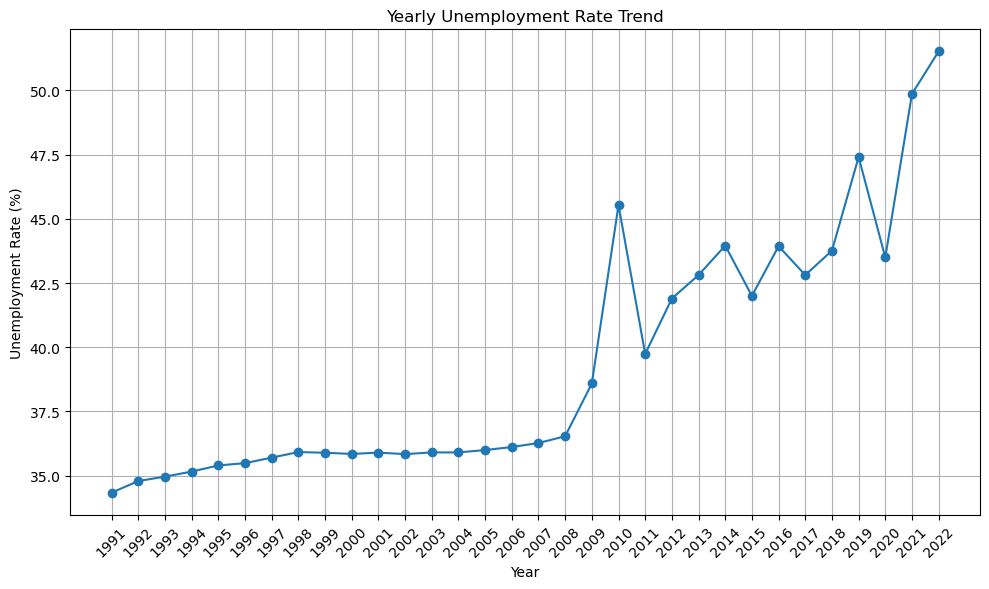

In [45]:

years = sa_unemp_df_pivoted['Year']
unemployment_rates = sa_unemp_df_pivoted['Unemployment_Rate']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, unemployment_rates, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Yearly Unemployment Rate Trend')

# Show grid
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
https://github.com/NkululekoMkhize/Innov8_Hackathon-team_dataset.csv/pull/1#issue-2182303608